In [309]:
import pandas as pd


# In[83]:
df = pd.read_csv('Data_Train.csv')
df.head(10)
print(df.shape)


(78458, 11)


In [310]:

#Replace K, M, B
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',', '')) 
    return float(x)

df.Likes = df.Likes.apply(value_to_float)
df.Popularity = df.Popularity.apply(value_to_float)
df.to_csv('Data_Train_Transformed_1.csv')
#df = df[df['Views'] > df["Likes"]]
# print(df.shape)
# print(df.head())

In [311]:
# df_mean = df.groupby('Name').mean()
# df_mean.to_csv('Test_2.csv')

In [312]:
#Labels
import numpy as np
bins = [-1,0,10,20,30,40,50,60,70,80,90,100,125,150,175,200,300,400,500,600,650,700,750,800,900,950,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000,15000,17500,20000,22500,
        25000,30000,35000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000,120000,140000,160000,
        180000,200000,240000,300000,360000,np.inf]
names = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,
         38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]

df['Name_Label'] = pd.cut(df['Likes'], bins, labels=names)

In [313]:
df.to_csv('Test_3.csv')

In [314]:
#Labels
df['Genre_Label'] = df['Genre'].map({'drumbass':1, 'deephouse':2,'metal':3, 'rock':4, 'electronic':5,
                                     'latin':6, 'dubstep':7, 'danceedm':8, 'trap':9, 'country':10,
                                     'pop':11, 'disco':12, 'classical':13, 'ambient':14, 'folksingersongwriter':15,
                                     'rbsoul':16, 'alternativerock':17, 'reggaeton':18, 'indie':19, 'hiphoprap':20,'all-music':21})

In [315]:
#Get counts by Name_label bins
df['Name_Label'].value_counts()
# df['Genre_Label'].value_counts()

27    5711
29    4776
2     4653
16    4536
28    3800
17    3686
18    3200
30    3050
19    2674
3     2484
37    2237
31    2001
1     1891
4     1825
24    1722
12    1654
32    1591
13    1531
14    1405
5     1351
15    1306
20    1187
33    1179
6     1151
21    1064
22    1003
7      970
8      950
34     939
23     932
      ... 
11     764
36     759
38     722
26     690
44     638
39     575
42     555
43     438
40     426
41     385
64     270
45     264
56     242
46     198
47     178
57     172
48     169
49     139
51     125
58     121
50     115
61     111
62     111
59     101
60      94
55      85
52      85
63      83
53      80
54      62
Name: Name_Label, Length: 64, dtype: int64

In [316]:
df['Name_Label'] = df['Name_Label'].astype('int64')
# df.isnull().sum()
# df.describe()
#df.dtypes
# # print(df.head()

In [317]:
# Distribution of features by Genre
df_mean = df.groupby('Genre').mean()
print(df_mean)

                         Unique_ID         Views    Comments         Likes  \
Genre                                                                        
all-music             7.993705e+05  2.451156e+06  294.354578  36251.202004   
alternativerock       7.715628e+05  8.545917e+05  190.173077  11453.076923   
ambient               1.104049e+06  3.985286e+05   87.917355   6400.989374   
classical             9.667382e+05  3.931904e+05   91.676662   7339.490222   
country               5.000266e+05  2.945058e+05  124.800595   5161.773810   
danceedm              7.098378e+05  2.667007e+05  114.792029   4879.496664   
deephouse             1.160870e+06  6.264949e+04   66.227404   1641.210070   
disco                 3.550900e+05  3.681520e+05   86.232620   6274.732620   
drumbass              5.862023e+05  3.712738e+04   67.277198   1334.828614   
dubstep               6.637812e+05  2.407431e+05  167.078182   5850.751818   
electronic            7.345176e+05  1.736503e+05   99.013965   3

In [318]:
# #Histogram Plotting each variable
# #Plotting Likes or comments or popularity
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.hist(df['Likes'])
# plt.ylabel('No of times')
# plt.show()

# #Plotting Comments
# plt.hist(df['Comments'])
# plt.ylabel('No of times')
# plt.show()

# #Plotting Popularity
# plt.hist(df['Popularity'])
# plt.ylabel('No of times')
# plt.show()

# #Plotting Views
# plt.hist(df['Views'])
# plt.ylabel('No of times')
# plt.show()

In [319]:
# # Scatter Plot
# fig, ax = plt.subplots(figsize=(16,8))
# ax.scatter(df['Unique_ID'], df['Popularity'])
# ax.set_xlabel('Unique Id')
# ax.set_ylabel('Popularity')

# fig, ax = plt.subplots(figsize=(16,8))
# ax.scatter(df['Unique_ID'], df['Views'])
# ax.set_xlabel('Unique Id')
# ax.set_ylabel('Views')

# fig, ax = plt.subplots(figsize=(16,8))
# ax.scatter(df['Unique_ID'], df['Likes'])
# ax.set_xlabel('Unique Id')
# ax.set_ylabel('Likes')

In [320]:
#Correlation matrix
print(df.head())
df.drop(['Unique_ID','Name','Genre','Country','Timestamp','Song_Name','Comments','Followers'],inplace = True, axis = 1)
df.head()


   Unique_ID              Name     Genre Country  \
0     413890         Hardstyle  danceedm      AU   
1     249453        Dj Aladdin  danceedm      AU   
2     681116  Maxximize On Air  danceedm      AU   
3     387253       GR6 EXPLODE    rbsoul      AU   
4    1428029          Tritonal  danceedm      AU   

                                           Song_Name  \
0  N-Vitral presents BOMBSQUAD - Poison Spitter (...   
1          Dj Aladdin - Old School Hip Hop Quick Mix   
2  Maxximize On Air - Mixed by Blasterjaxx - Epis...   
3                MC Yago - Tenho Compromisso (DJ R7)   
4                         Escape (feat. Steph Jones)   

                    Timestamp   Views  Comments   Likes  Popularity  \
0  2018-03-30 15:24:45.000000   14017         4   499.0        97.0   
1  2016-06-20 05:58:52.000000    1918        17    49.0        17.0   
2  2015-05-08 17:45:59.000000    9668        11   312.0        91.0   
3  2017-06-08 23:50:03.000000  113036         2  2400.0        76.

,Views,Likes,Popularity,Name_Label,Genre_Label
0,14017,499.0,97.0,18,8
1,1918,49.0,17.0,6,8
2,9668,312.0,91.0,17,8
3,113036,2400.0,76.0,29,16
4,110024,3031.0,699.0,30,8


In [321]:
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# # Converting Genre and Name to labelencoding
# labelencoder = LabelEncoder()
# df['Genre'] = labelencoder.fit_transform(df['Genre'])
# # df['Name_Label'] = labelencoder.fit_transform(df['Name_Label'])
# df.head()


In [322]:
df.to_csv('Test_1.csv')

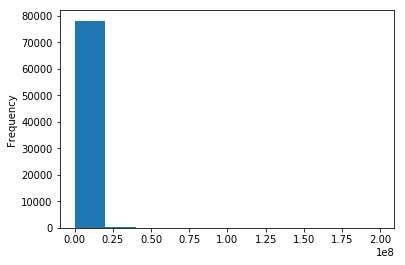

In [323]:
y = df['Views']
df.drop('Views', inplace=True,axis=1)
y.plot.hist()

In [324]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
sc_x = StandardScaler()
ct = ColumnTransformer([
         ('somename', StandardScaler(), ['Likes','Popularity','Name_Label','Genre_Label'])
       ], remainder='passthrough')
df = ct.fit_transform(df)
df = pd.DataFrame(df,columns=['Likes','Popularity','Name_Label','Genre_Label'])
print(df.head())

      Likes  Popularity  Name_Label  Genre_Label
0 -0.157700   -0.171261   -0.272258    -0.222982
1 -0.166227   -0.187892   -1.210858    -0.222982
2 -0.161243   -0.172509   -0.350475    -0.222982
3 -0.121678   -0.175627    0.588125     1.207041
4 -0.109722   -0.046114    0.666342    -0.222982


D:\Applns\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Applns\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [325]:
# #Removing outliers using IQR
# Q1 = df.quantile(0.25,numeric_only=True)
# Q3 = df.quantile(0.75,numeric_only=True)
# IQR = Q3 - Q1
# #df = df[~((df["Likes"] < (Q1 - 1.5 * IQR)) |(df["Likes"] > (Q3 + 1.5 * IQR)))]
# df= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(df.shape)
# df.head()

In [326]:
df.isnull().sum()


Likes          0
Popularity     0
Name_Label     0
Genre_Label    0
dtype: int64

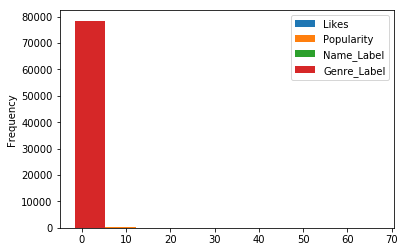

In [327]:
df.describe()
df.plot.hist()

In [328]:
from sklearn.model_selection import train_test_split
#print(df_scaled)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=205)

In [329]:
#XGB Boost regression
import xgboost as xgb
from sklearn import metrics
xlf = xgb.XGBRegressor()
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)])
# calculate the auc score
y_pred = xlf.predict(X_test)
#RMSE - Test
print("RMSE - XGBoost regression: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


[18:36:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.49945e+06
[1]	validation_0-rmse:3.18791e+06
[2]	validation_0-rmse:2.9255e+06
[3]	validation_0-rmse:2.67708e+06
[4]	validation_0-rmse:2.44818e+06
[5]	validation_0-rmse:2.25436e+06


D:\Applns\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[6]	validation_0-rmse:2.0808e+06
[7]	validation_0-rmse:1.92377e+06
[8]	validation_0-rmse:1.78549e+06
[9]	validation_0-rmse:1.66981e+06
[10]	validation_0-rmse:1.56861e+06
[11]	validation_0-rmse:1.48069e+06
[12]	validation_0-rmse:1.39755e+06
[13]	validation_0-rmse:1.32158e+06
[14]	validation_0-rmse:1.2613e+06
[15]	validation_0-rmse:1.20429e+06
[16]	validation_0-rmse:1.15446e+06
[17]	validation_0-rmse:1.11115e+06
[18]	validation_0-rmse:1.0745e+06
[19]	validation_0-rmse:1.04565e+06
[20]	validation_0-rmse:1.01897e+06
[21]	validation_0-rmse:995150
[22]	validation_0-rmse:975655
[23]	validation_0-rmse:957899
[24]	validation_0-rmse:945843
[25]	validation_0-rmse:933935
[26]	validation_0-rmse:924796
[27]	validation_0-rmse:917646
[28]	validation_0-rmse:909890
[29]	validation_0-rmse:903442
[30]	validation_0-rmse:897232
[31]	validation_0-rmse:892111
[32]	validation_0-rmse:888845
[33]	validation_0-rmse:885711
[34]	validation_0-rmse:882817
[35]	validation_0-rmse:880985
[36]	validation_0-rmse:879755
[3

In [330]:
#Implementing Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print("RMSE - Linear regression: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


RMSE - Linear regression:  880817.749061393


In [331]:
import pandas as pd
# In[83]:
df = pd.read_csv('D:\Hackathon\MachineHack - Music\Data_Test.csv')
df.head(10)
print(df.shape)

(19615, 10)


In [332]:
#Replace K, M, B
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',', '')) 
    return float(x)

df.Likes = df.Likes.apply(value_to_float)
df.Popularity = df.Popularity.apply(value_to_float)

In [333]:
df.to_csv('Data_Test_Transformed.csv')

In [334]:
#df.dtypes
df['Likes'] = df['Likes'].astype('float64')
df['Popularity'] = df['Popularity'].astype('float64')

In [335]:
#Labels
import numpy as np
bins = [-1,0,10,20,30,40,50,60,70,80,90,100,125,150,175,200,300,400,500,600,650,700,750,800,900,950,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000,15000,17500,20000,22500,
        25000,30000,35000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000,120000,140000,160000,
        180000,200000,240000,300000,360000,np.inf]
names = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,
         38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]

df['Name_Label'] = pd.cut(df['Likes'], bins, labels=names)

In [336]:
#Labels
df['Genre_Label'] = df['Genre'].map({'drumbass':1, 'deephouse':2,'metal':3, 'rock':4, 'electronic':5,
                                     'latin':6, 'dubstep':7, 'danceedm':8, 'trap':9, 'country':10,
                                     'pop':11, 'disco':12, 'classical':13, 'ambient':14, 'folksingersongwriter':15,
                                     'rbsoul':16, 'alternativerock':17, 'reggaeton':18, 'indie':19, 'hiphoprap':20,'all-music':21})

In [337]:
#Get counts by Name_label bins
df['Name_Label'].value_counts()
# df['Genre_Label'].value_counts()

27    1449
29    1209
16    1151
2     1123
17     961
28     935
18     796
30     724
19     674
3      617
37     541
31     517
1      464
4      427
24     414
12     406
13     369
14     368
32     355
5      332
20     321
15     319
33     313
21     293
6      291
22     260
7      247
34     244
9      237
8      236
      ... 
26     190
36     186
44     174
38     171
11     164
42     147
39     144
40     111
43     107
41      89
64      73
46      61
56      49
47      46
57      44
45      41
48      40
50      36
51      33
61      33
62      33
52      30
59      29
49      26
63      25
55      22
53      22
58      20
54      15
60      15
Name: Name_Label, Length: 64, dtype: int64

In [338]:
df['Name_Label'] = df['Name_Label'].astype('int64')

In [339]:
#Correlation matrix
df.drop(['Unique_ID','Name','Genre','Country','Timestamp','Song_Name','Comments','Followers'],inplace = True, axis = 1)

In [340]:
df = pd.DataFrame(df)
df.head()

,Likes,Popularity,Name_Label,Genre_Label
0,5428.0,118.0,32,21
1,738.0,195.0,22,8
2,386.0,96.0,17,8
3,388.0,19.0,17,21
4,79.0,1.0,9,4


In [341]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
sc_x = StandardScaler()
ct = ColumnTransformer([
          ('somename', StandardScaler(), ['Likes','Popularity','Name_Label','Genre_Label'])
        ], remainder='passthrough')
df = ct.fit_transform(df)
df = pd.DataFrame(df,columns=['Likes','Popularity','Name_Label','Genre_Label'])
print(df.head())

      Likes  Popularity  Name_Label  Genre_Label
0 -0.064302   -0.166896    0.822776     2.100806
1 -0.153171   -0.150888    0.040609    -0.222982
2 -0.159841   -0.171469   -0.350475    -0.222982
3 -0.159803   -0.187476   -0.350475     2.100806
4 -0.165658   -0.191218   -0.976208    -0.937994


D:\Applns\Anaconda3\lib\site-packages\sklearn\pipeline.py:605: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


In [342]:
# calculate the auc score
y_pred_1 = xlf.predict(df)
y_pred_1 = pd.DataFrame(y_pred_1)
y_pred_1.to_csv('Data_Test_Predicted_1.csv',sep='#')